In [40]:
import numpy as np
import pandas as pd
from statistics import mode

In [41]:
df=pd.read_csv("hierarchical - hierarchical.csv")

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       200 non-null    float64
 1   y       200 non-null    float64
 2   z       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [43]:
df.describe()

x           y           z
count  200.000000  200.000000  200.000000
mean    69.641904   42.528052   81.890990
std     56.121588   21.662937   30.431830
min     -6.085700  -21.818700   12.661980
25%     16.277503   26.769115   58.444248
50%     52.077445   45.017610   74.748455
75%    125.275675   59.244277  104.439850
max    176.974500   85.899060  157.253800

In [44]:
df=df.to_numpy()

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df=scaler.transform(df)

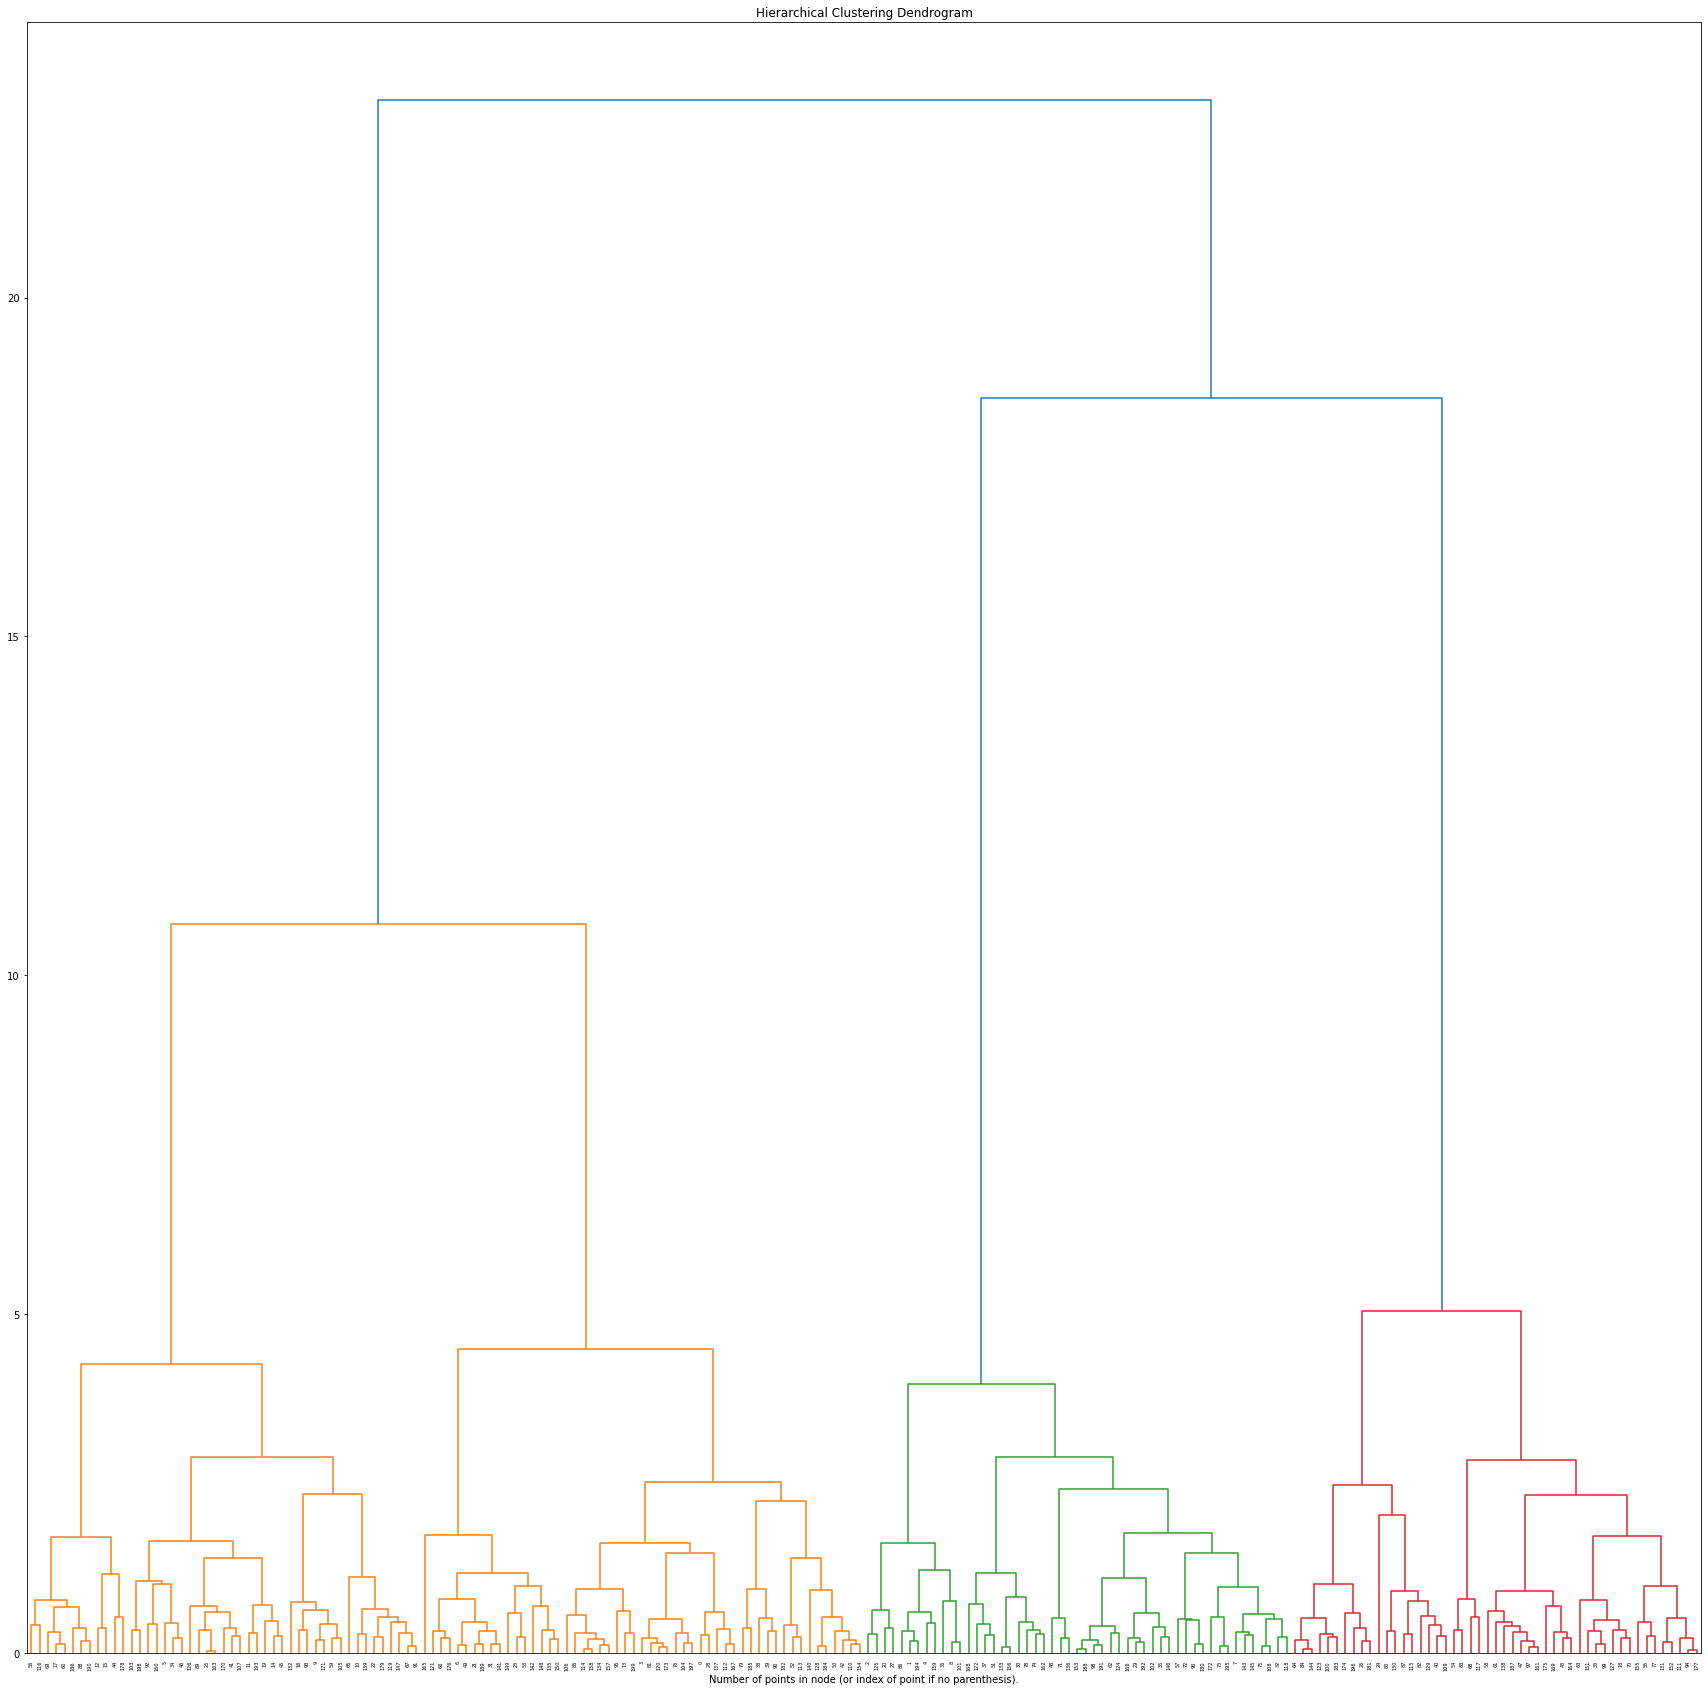

In [46]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


x = df

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=20, n_clusters=None)

model = model.fit(x)
plt.figure(figsize=(30,30))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

here number of cluster we can take as 4 and i have implemented rest code by taking n_cluster as 4   and threshhold for cutting the dendrogram is 10

'ax.scatter(x[classes == 4,0],x[classes == 4,1],x[classes == 4,2])\nax.scatter(x[classes == 5,0],x[classes == 5,1],x[classes == 5,2])\nax.scatter(x[classes == 6,0],x[classes == 6,1],x[classes == 6,2])\nax.scatter(x[classes == 7,0],x[classes == 7,1],x[classes == 7,2])\nax.scatter(x[classes == 8,0],x[classes == 8,1],x[classes == 8,2])\nax.scatter(x[classes == 9,0],x[classes == 9,1],x[classes == 9,2])'

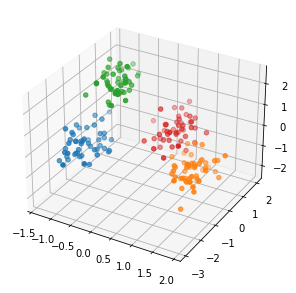

In [47]:
clustering = AgglomerativeClustering(n_clusters=4).fit(df)
classes=clustering.labels_
x=df
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[classes == 0,0],x[classes == 0,1],x[classes == 0,2])
ax.scatter(x[classes == 1,0],x[classes == 1,1],x[classes == 1,2])
ax.scatter(x[classes == 2,0],x[classes == 2,1],x[classes == 2,2])
ax.scatter(x[classes == 3,0],x[classes == 3,1],x[classes == 3,2])
'''ax.scatter(x[classes == 4,0],x[classes == 4,1],x[classes == 4,2])
ax.scatter(x[classes == 5,0],x[classes == 5,1],x[classes == 5,2])
ax.scatter(x[classes == 6,0],x[classes == 6,1],x[classes == 6,2])
ax.scatter(x[classes == 7,0],x[classes == 7,1],x[classes == 7,2])
ax.scatter(x[classes == 8,0],x[classes == 8,1],x[classes == 8,2])
ax.scatter(x[classes == 9,0],x[classes == 9,1],x[classes == 9,2])'''

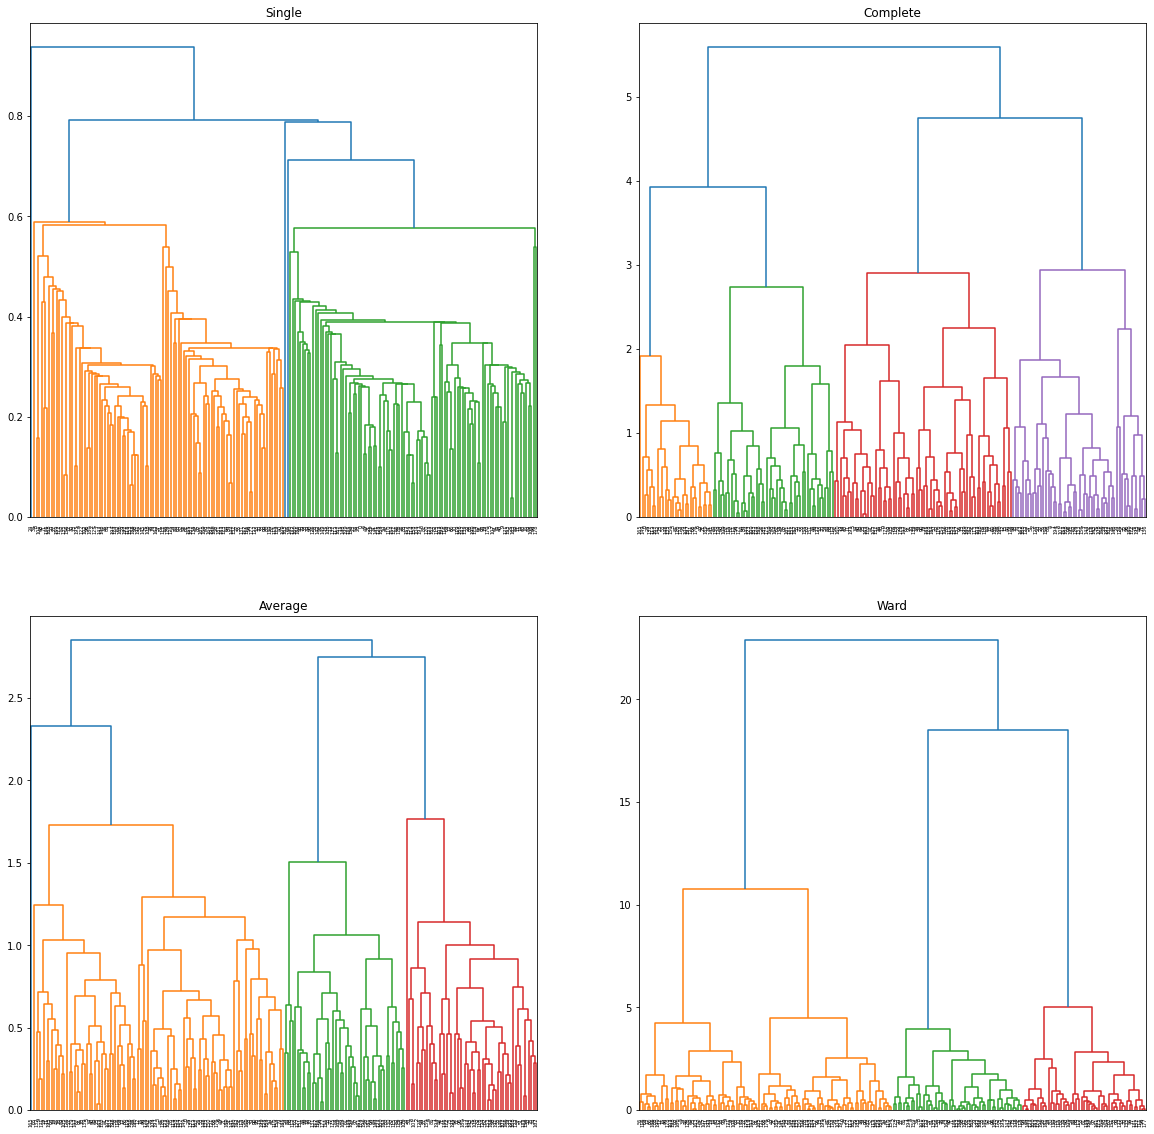

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z1 = linkage(df, method='single', metric='euclidean')
Z2 = linkage(df, method='complete', metric='euclidean')
Z3 = linkage(df, method='average', metric='euclidean')
Z4 = linkage(df, method='ward', metric='euclidean')
plt.figure(figsize=(20,20))
plt.subplot(2,2,1), dendrogram(Z1), plt.title('Single')
plt.subplot(2,2,2), dendrogram(Z2), plt.title('Complete')
plt.subplot(2,2,3), dendrogram(Z3), plt.title('Average')
plt.subplot(2,2,4), dendrogram(Z4), plt.title('Ward')
plt.show()

when we take linkage matrix as single then number of cluster is 5 and threshhold for cutting the dendrogram is 0.7

'ax.scatter(x[classes == 5,0],x[classes == 5,1],x[classes == 5,2])\nax.scatter(x[classes == 6,0],x[classes == 6,1],x[classes == 6,2])\nax.scatter(x[classes == 7,0],x[classes == 7,1],x[classes == 7,2])\nax.scatter(x[classes == 8,0],x[classes == 8,1],x[classes == 8,2])\nax.scatter(x[classes == 9,0],x[classes == 9,1],x[classes == 9,2])'

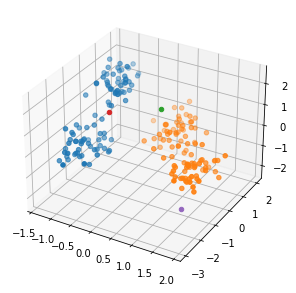

In [49]:
clustering = AgglomerativeClustering(n_clusters=5,linkage='single').fit(df)
classes=clustering.labels_
x=df
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[classes == 0,0],x[classes == 0,1],x[classes == 0,2])
ax.scatter(x[classes == 1,0],x[classes == 1,1],x[classes == 1,2])
ax.scatter(x[classes == 2,0],x[classes == 2,1],x[classes == 2,2])
ax.scatter(x[classes == 3,0],x[classes == 3,1],x[classes == 3,2])
ax.scatter(x[classes == 4,0],x[classes == 4,1],x[classes == 4,2])
'''ax.scatter(x[classes == 5,0],x[classes == 5,1],x[classes == 5,2])
ax.scatter(x[classes == 6,0],x[classes == 6,1],x[classes == 6,2])
ax.scatter(x[classes == 7,0],x[classes == 7,1],x[classes == 7,2])
ax.scatter(x[classes == 8,0],x[classes == 8,1],x[classes == 8,2])
ax.scatter(x[classes == 9,0],x[classes == 9,1],x[classes == 9,2])'''

when we take linkage matrix as complete then number of cluster is 4 and threshhold for cutting the dendrogram is 3

'ax.scatter(x[classes == 4,0],x[classes == 4,1],x[classes == 4,2])\nax.scatter(x[classes == 5,0],x[classes == 5,1],x[classes == 5,2])\nax.scatter(x[classes == 6,0],x[classes == 6,1],x[classes == 6,2])\nax.scatter(x[classes == 7,0],x[classes == 7,1],x[classes == 7,2])\nax.scatter(x[classes == 8,0],x[classes == 8,1],x[classes == 8,2])\nax.scatter(x[classes == 9,0],x[classes == 9,1],x[classes == 9,2])'

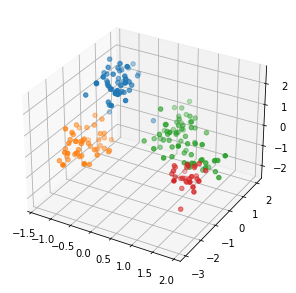

In [50]:
clustering = AgglomerativeClustering(n_clusters=4,linkage='complete').fit(df)
classes=clustering.labels_
x=df
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[classes == 0,0],x[classes == 0,1],x[classes == 0,2])
ax.scatter(x[classes == 1,0],x[classes == 1,1],x[classes == 1,2])
ax.scatter(x[classes == 2,0],x[classes == 2,1],x[classes == 2,2])
ax.scatter(x[classes == 3,0],x[classes == 3,1],x[classes == 3,2])
'''ax.scatter(x[classes == 4,0],x[classes == 4,1],x[classes == 4,2])
ax.scatter(x[classes == 5,0],x[classes == 5,1],x[classes == 5,2])
ax.scatter(x[classes == 6,0],x[classes == 6,1],x[classes == 6,2])
ax.scatter(x[classes == 7,0],x[classes == 7,1],x[classes == 7,2])
ax.scatter(x[classes == 8,0],x[classes == 8,1],x[classes == 8,2])
ax.scatter(x[classes == 9,0],x[classes == 9,1],x[classes == 9,2])'''

when we take linkage matrix as average then number of cluster is 4 and threshhold for cutting the dendrogram is 2

'ax.scatter(x[classes == 4,0],x[classes == 4,1],x[classes == 4,2])\nax.scatter(x[classes == 5,0],x[classes == 5,1],x[classes == 5,2])\nax.scatter(x[classes == 6,0],x[classes == 6,1],x[classes == 6,2])\nax.scatter(x[classes == 7,0],x[classes == 7,1],x[classes == 7,2])\nax.scatter(x[classes == 8,0],x[classes == 8,1],x[classes == 8,2])\nax.scatter(x[classes == 9,0],x[classes == 9,1],x[classes == 9,2])'

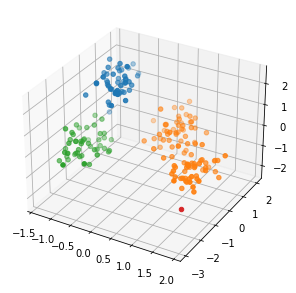

In [51]:
clustering = AgglomerativeClustering(n_clusters=4,linkage='average').fit(df)
classes=clustering.labels_
x=df
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[classes == 0,0],x[classes == 0,1],x[classes == 0,2])
ax.scatter(x[classes == 1,0],x[classes == 1,1],x[classes == 1,2])
ax.scatter(x[classes == 2,0],x[classes == 2,1],x[classes == 2,2])
ax.scatter(x[classes == 3,0],x[classes == 3,1],x[classes == 3,2])
'''ax.scatter(x[classes == 4,0],x[classes == 4,1],x[classes == 4,2])
ax.scatter(x[classes == 5,0],x[classes == 5,1],x[classes == 5,2])
ax.scatter(x[classes == 6,0],x[classes == 6,1],x[classes == 6,2])
ax.scatter(x[classes == 7,0],x[classes == 7,1],x[classes == 7,2])
ax.scatter(x[classes == 8,0],x[classes == 8,1],x[classes == 8,2])
ax.scatter(x[classes == 9,0],x[classes == 9,1],x[classes == 9,2])'''

when we take linkage matrix as ward then number of cluster is 4 and threshhold for cutting the dendrogram is 10

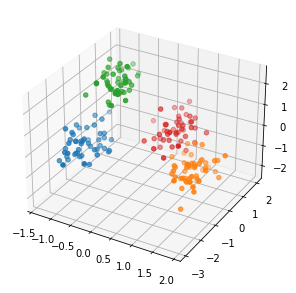

In [52]:
clustering = AgglomerativeClustering(n_clusters=4,linkage='ward').fit(df)
classes=clustering.labels_
x=df
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[classes == 0,0],x[classes == 0,1],x[classes == 0,2])
ax.scatter(x[classes == 1,0],x[classes == 1,1],x[classes == 1,2])
ax.scatter(x[classes == 2,0],x[classes == 2,1],x[classes == 2,2])
ax.scatter(x[classes == 3,0],x[classes == 3,1],x[classes == 3,2])